In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [5]:
file_train_text = "data/training_text/training_text"
file_train_variant = "data/training_variants/training_variants"

In [6]:
train_text = pd.read_csv(file_train_text, sep = '\|\|')
train_text.index.name = "ID"
train_text.columns = ["Text"]

train_variant = pd.read_csv(file_train_variant)
train_variant.set_index("ID",inplace = True)

/home/ragou/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
train_text[train_text.index == 1].values

array([[" Abstract Background  Non-small cell lung cancer (NSCLC) is a heterogeneous group of disorders with a number of genetic and proteomic alterations. c-CBL is an E3 ubiquitin ligase and adaptor molecule important in normal homeostasis and cancer. We determined the genetic variations of c-CBL, relationship to receptor tyrosine kinases (EGFR and MET), and functionality in NSCLC.  Methods and Findings  Using archival formalin-fixed paraffin embedded (FFPE) extracted genomic DNA, we show that c-CBL mutations occur in somatic fashion for lung cancers. c-CBL mutations were not mutually exclusive of MET or EGFR mutations; however they were independent of p53 and KRAS mutations. In normal/tumor pairwise analysis, there was significant loss of heterozygosity (LOH) for the c-CBL locus (22%, n\u200a=\u200a8/37) and none of these samples revealed any mutation in the remaining copy of c-CBL. The c-CBL LOH also positively correlated with EGFR and MET mutations observed in the same samples. Usi

In [5]:
train_variant[train_variant["Variation"].isin(["C396R", "H398Q", "Y371H", "K382E", "C381A"])]

,Gene,Variation,Class
ID,,,
8,CBL,Y371H,4
11,CBL,K382E,4
13,CBL,C381A,4
21,CBL,C396R,4


In [6]:
train_variant[train_variant["Variation"] == "Q249E"]

,Gene,Variation,Class
ID,,,
2,CBL,Q249E,2


In [7]:
train_text.loc[[6],].values

array([['Oncogenic mutations in the monomeric Casitas B-lineage lymphoma (Cbl) gene have been found in many tumors, but their significance remains largely unknown. Several human c-Cbl (CBL) structures have recently been solved depicting the protein at different stages of its activation cycle and thus provide mechanistic insight underlying how stability-activity tradeoffs in cancer-related proteins may influence disease onset and progression. In this study, we computationally modeled the effects of missense cancer mutations on structures representing four stages of the CBL activation cycle to identify driver mutations that affect CBL stability, binding, and activity. We found that recurrent, homozygous, and leukemia-specific mutations had greater destabilizing effects on CBL states than did random non-cancer mutations. We further tested the ability of these computational models assessing the changes in CBL stability and its binding to ubiquitin conjugating enzyme E2, by performing blind

In [8]:
gene_count = train_variant["Gene"].value_counts().loc[lambda x : x > 100].to_dict()

In [9]:
gene_class = train_variant[train_variant["Gene"].isin(gene_count.keys())]

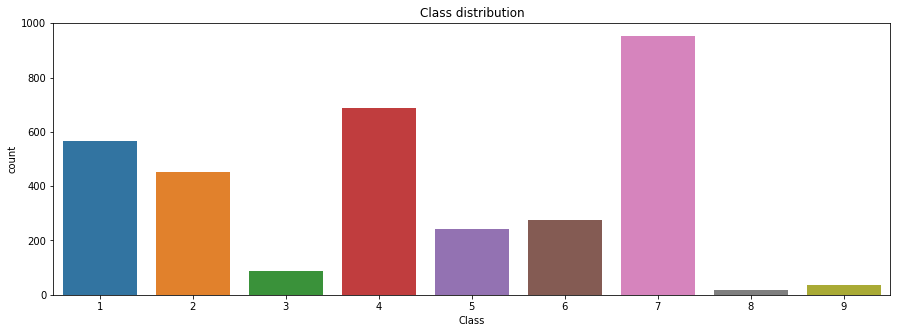

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x = train_variant["Class"])
plt.title("Class distribution")
plt.show()

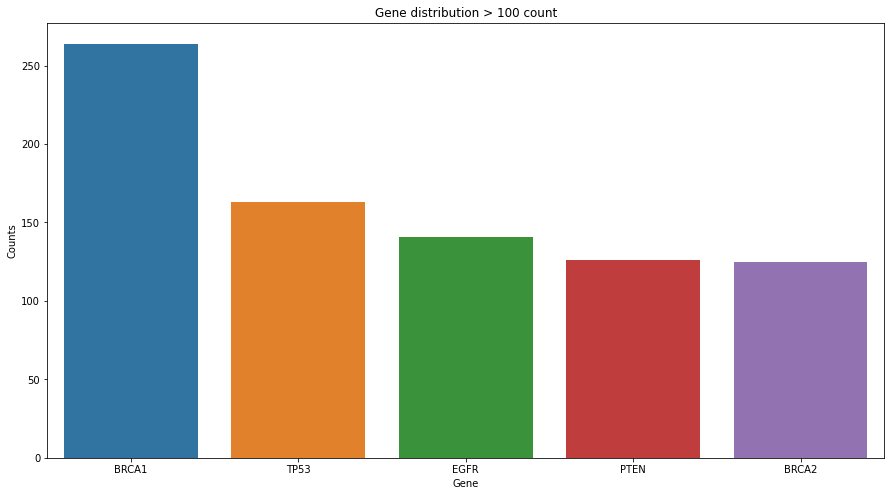

In [11]:
plt.figure(figsize=(15,8))

sns.barplot( x = list(gene_count.keys()), y = list(gene_count.values()))
plt.title("Gene distribution > 100 count")
plt.ylabel("Counts")
plt.xlabel("Gene")

plt.show()

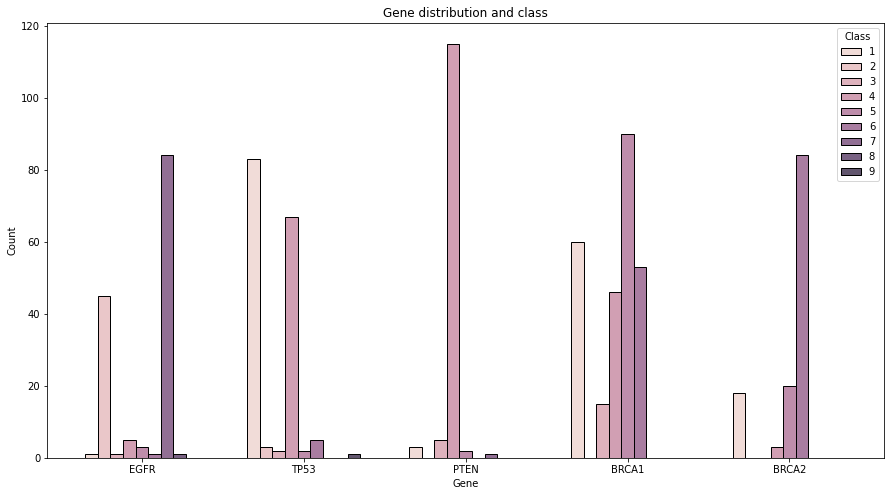

In [12]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_variant[train_variant["Gene"].isin(gene_count.keys())],
             x="Gene", hue="Class", multiple="dodge", shrink=.7)
plt.title("Gene distribution and class")
plt.show()

In [105]:
train_variant.head(5)

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [106]:
train_text.head(5)

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [171]:
def clean_text(article):
    dot3 = re.compile("[.]{2,}")
    fig = re.compile("Fig[s]?\.")
    decimal = re.compile("\d+\.\d+")    
    clean_article = dot3.sub(".", article)
    clean_article = fig.sub("", clean_article)
    clean_article = decimal.sub("", clean_article)
    return clean_article

def join_tuple_string(strings_tuple):
    return ' '.join(strings_tuple)

def find_match(text, word):
    clean = clean_text(text)
    target_sentence = "([^.]*{}[^.]*\.)".format(word)
    before_after_target = "([^.]*\.){0,1}"    
    match_exp = re.compile(before_after_target + target_sentence + before_after_target)
    match_text = match_exp.findall(clean)    
    return "".join(list(map(join_tuple_string, match_text)))

In [161]:
word_to_search = "FAM58A"

In [162]:
article = train_text.loc[0].values[0]

In [163]:
article.count(word_to_search)

34

In [164]:
clean_match = find_match(article, word_to_search)

In [170]:
print("Before selection : total lenght {} and {} occurences of the word {}".format(
    len(article),article.count(word_to_search) , word_to_search))

print("After selection :  total lenght {} and {} occurences of the word {}".format(
    len(clean_match),clean_match.count(word_to_search), word_to_search))

Before selection : total lenght 39672 and 34 occurences of the word FAM58A
After selection :  total lenght 9356 and 34 occurences of the word FAM58A
